In [59]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

class Ellipsoid (object):
    def __init__ ( self, A,B,C ):
        self.A = A
        self.B = B
        self.C = C
        
    
    def centralSB (self,phi,theta): # calculated the Central SB of our galaxy 
        v = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
        full_length = 2/((v[0]**2/self.A**2)+(v[1]**2/self.B**2)+(v[2]**2/self.C**2))
        return full_length 
    
    def effSB (self,phi,theta): # calculates the effective SB of our galaxy
        C1 = (self.A**2 * (np.cos(phi)**2 + np.cos(theta)**2 * np.sin(phi)**2) + 
            self.B**2 * (np.sin(phi)**2 + np.cos(theta)**2 * np.cos(phi)**2)+ 
            self.C**2 * np.sin(theta))
        C0 = (self.A**2 * self.C**2 * np.sin(theta)**2 * np.cos(phi)**2 + 
            self.B**2 * self.C**2 * np.sin(theta)**2 * np.sin(phi)**2 + 
            self.A**2 * self.B**2 * np.cos(theta)**2)
        
        
        d = (C1**2) - (4*C0) 
        b1,b2 = np.sqrt((-C1-np.sqrt(d))/-2) , np.sqrt((-C1+np.sqrt(d))/-2) # only the real positive values matter
        
        
        a_val = np.max([b1,b2],axis=0) 
        b_val = np.min([b1,b2],axis=0)
        
        ba_ratio = b_val/a_val
        
        pro_area = np.pi * a_val * b_val # projected area of the ellipse 
        return ba_ratio,pro_area
    
    
    
    
    
    
    

    
    
class Ellipsoid1 (object):
    def __init__ ( self,B,C ):
        self.B = B
        self.C = C
    
    
    
    
    def effSB2 (self,phi,theta): # this will show the encompass the intrinsic axis ratios B/A and C/A
        C1 = ((np.cos(phi)**2 + np.cos(theta)**2 * np.sin(phi)**2) + 
            self.B**2 * (np.sin(phi)**2 + np.cos(theta)**2 * np.cos(phi)**2)+ 
            self.C**2 * np.sin(theta))
        C0 = (self.C**2 * np.sin(theta)**2 * np.cos(phi)**2 + 
            self.B**2 * self.C**2 * np.sin(theta)**2 * np.sin(phi)**2 + self.B**2 * np.cos(theta)**2)
        
        
        d = (C1**2) - (4*C0)
        print(C1-cmath.sqrt(d))
        b1,b2 = np.sqrt((-C1-np.sqrt(d))/-2) , np.sqrt((-C1+np.sqrt(d))/-2)
        
        a_val = np.max([b1,b2],axis=0)
        b_val = np.min([b1,b2],axis=0)
        pro_area = np.pi * a_val * b_val
        return a_val,b_val,pro_area
    
    def obs_ratio (self,phi,theta):
        C1 = ((np.cos(phi)**2 + np.cos(theta)**2 * np.sin(phi)**2) + 
            self.B**2 * (np.sin(phi)**2 + np.cos(theta)**2 * np.cos(phi)**2)+ 
            self.C**2 * np.sin(theta))
        C0 = (self.C**2 * np.sin(theta)**2 * np.cos(phi)**2 + 
            self.B**2 * self.C**2 * np.sin(theta)**2 * np.sin(phi)**2 + self.B**2 * np.cos(theta)**2)
        
        h = np.sqrt((C1-2*np.sqrt(C0))/(C1+2*np.sqrt(C0)))
        
        ba_ratio = (1-h)/(1+h)
        
        return ba_ratio
        

In [44]:
b1 = np.array([1,2])
b2 = np.array([3,4])
np.max([b1,b2],axis=1)


array([2, 4])

In [2]:
ell1 = Ellipsoid1(.7,.5)

In [3]:
dum1 = ell1.effSB2(np.pi/2,0),ell1.effSB2(np.pi/2,np.pi/2),ell1.effSB2(0,np.pi/2)

(0.9799999999999998+0j)
(0.4999999999999999+0j)
(0.5+0j)


In [4]:
print(dum1)

((1.0, 0.7, 2.199114857512855), (0.7000000000000001, 0.49999999999999994, 1.0995574287564274), (1.0, 0.5, 1.5707963267948966))


In [5]:
test = ell1.obs_ratio(1.5,1.5)

In [6]:
print(test)

0.7158172423852314


In [7]:
ell = Ellipsoid(2,.7,.5)

In [8]:
dum = ell.effSB(np.pi/2,0),ell.effSB(np.pi/2,np.pi/2),ell.effSB(0,np.pi/2)

(0.9799999999999995+0j)
(0.4999999999999999+0j)
(0.5+0j)


In [9]:
print(dum)

((0.3499999999999999,), (0.7142857142857142,), (0.25,))


In [82]:
phi = np.random.uniform(0,2*np.pi,10000)
nu = np.random.uniform(0,1,10000)
theta = np.arccos(2*nu-1)


print(phi)

[4.44209023 1.74830315 3.34532222 ... 4.02056028 1.16483014 0.54319266]


In [64]:
ell = Ellipsoid(1,1,1)
dumm = ell.centralSB(phi,theta)
print(dumm)

[2. 2. 2. ... 2. 2. 2.]


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <a list of 10 Patch objects>)

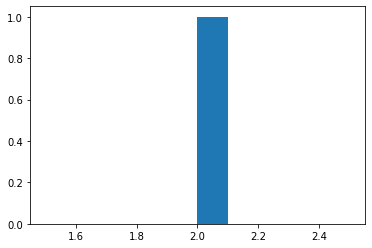

In [67]:
plt.hist(dumm[0])

In [65]:
dumm1 = ell.effSB(phi,theta)
print(dumm1)

(array([0.6154718 , 0.68404697, 0.62924697, ..., 0.96187897, 0.68258657,
       0.64941211]), array([3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
       3.14159265]))


(array([2930., 1298.,  982.,  817.,  786.,  692.,  681.,  665.,  577.,
         572.]),
 array([0.6096118 , 0.64864938, 0.68768696, 0.72672454, 0.76576213,
        0.80479971, 0.84383729, 0.88287487, 0.92191245, 0.96095004,
        0.99998762]),
 <a list of 10 Patch objects>)

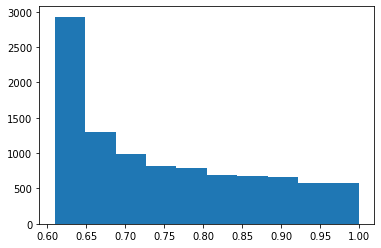

In [66]:
plt.hist(dumm1[0])

In [68]:
ell.effSB(0,0)

(1.0, 3.141592653589793)

In [69]:
ell.effSB(np.pi/2,np.pi/2)

(1.0, 3.141592653589793)

In [75]:
x = np.array([0,np.pi/2])

In [76]:
ell.effSB(x,x)

(array([1., 1.]), array([3.14159265, 3.14159265]))

In [83]:
ell1 = Ellipsoid1(1,1)

In [84]:
run = ell1.obs_ratio(phi,theta)

(array([2923., 1254.,  990.,  829.,  738.,  706.,  690.,  669.,  628.,
         573.]),
 array([0.6096118 , 0.64864128, 0.68767075, 0.72670023, 0.76572971,
        0.80475919, 0.84378867, 0.88281815, 0.92184763, 0.96087711,
        0.99990659]),
 <a list of 10 Patch objects>)

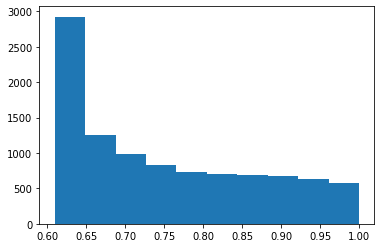

In [85]:
plt.hist(run)